In [1]:
!pip install tensorflow

In [2]:
!pip install opencv-python

In [3]:
!pip install matplotlib

In [4]:
#checking if the dependencies are installed properly
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     

In [5]:
import tensorflow as tf
import os

In [6]:
import cv2

In [7]:
pip install Pillow

Note: you may need to restart the kernel to use updated packages.


In [10]:
data_dir = 'DataSet'

In [11]:
os.listdir(data_dir)

['no_yawn', 'yawn']

In [12]:
import numpy as np

In [13]:
cv2.imread(os.path.join('DataSet','Open','_0.jpg'))

In [14]:
img = cv2.imread(os.path.join('DataSet','Open','_0.jpg'))

In [15]:
from matplotlib import pyplot as plt

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('DataSet')

Found 1449 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
data_iterator

In [20]:
batch = data_iterator.next()

In [21]:
batch

(array([[[[1.96531250e+02, 2.02531250e+02, 2.00531250e+02],
          [1.90468750e+02, 1.96468750e+02, 1.94468750e+02],
          [1.89718750e+02, 1.95718750e+02, 1.93718750e+02],
          ...,
          [1.36125000e+02, 1.35125000e+02, 1.41078125e+02],
          [1.25265625e+02, 1.23843750e+02, 1.32890625e+02],
          [1.26062500e+02, 1.24500000e+02, 1.34187500e+02]],
 
         [[1.84984375e+02, 1.93984375e+02, 1.90984375e+02],
          [1.90203125e+02, 1.99203125e+02, 1.96203125e+02],
          [1.90953125e+02, 1.99953125e+02, 1.96953125e+02],
          ...,
          [1.86687500e+02, 1.87000000e+02, 1.84093750e+02],
          [1.71296875e+02, 1.71609375e+02, 1.71078125e+02],
          [1.68375000e+02, 1.68453125e+02, 1.68968750e+02]],
 
         [[1.85109375e+02, 1.96109375e+02, 1.92109375e+02],
          [1.93218750e+02, 2.04218750e+02, 2.00218750e+02],
          [1.93828125e+02, 2.04828125e+02, 2.00828125e+02],
          ...,
          [2.18671875e+02, 2.20812500e+02, 2.0720

In [22]:
len(batch)

2

In [23]:
batch[1]

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0])

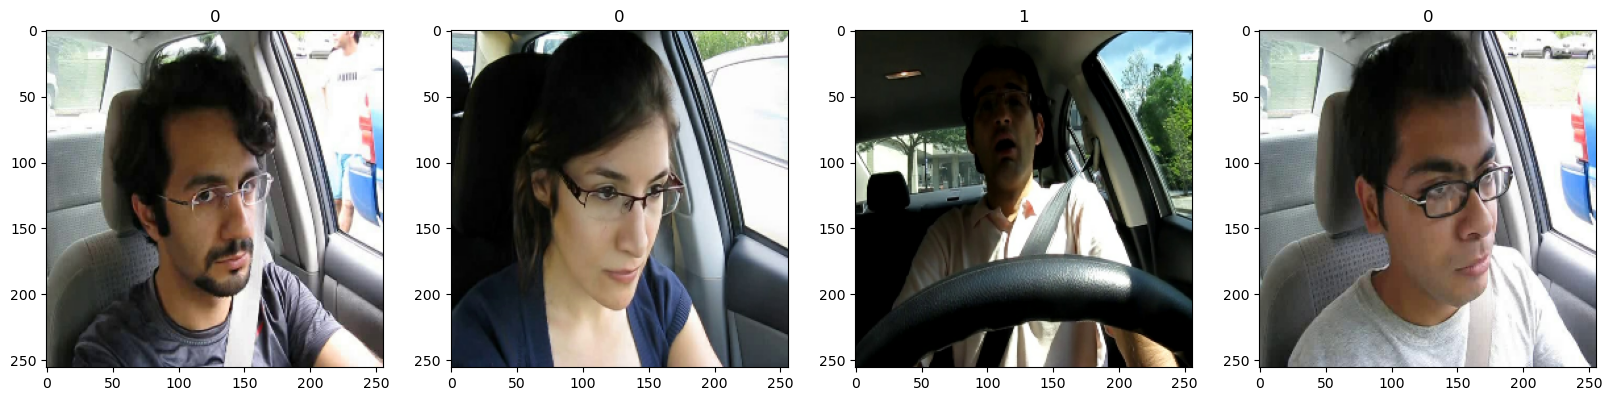

In [24]:
#checking which class is assigned to which image
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
# yawning class = 1
# not yawning class = 0


Raw

In [26]:
len(data)

46

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [28]:
test_size

4

In [29]:
train_size

32

In [30]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

building deeplearning model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [33]:
model = Sequential()


In [34]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [39]:
logdir='log'


In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [41]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
32/32 [==============================] - 71s 2s/step - loss: 69.9745 - accuracy: 0.6289 - val_loss: 0.5224 - val_accuracy: 0.7292
Epoch 2/20
32/32 [==============================] - 66s 2s/step - loss: 0.4411 - accuracy: 0.7822 - val_loss: 0.3282 - val_accuracy: 0.8611
Epoch 3/20
32/32 [==============================] - 1749s 56s/step - loss: 0.2449 - accuracy: 0.9072 - val_loss: 0.2488 - val_accuracy: 0.8924
Epoch 4/20
32/32 [==============================] - 35s 1s/step - loss: 0.1229 - accuracy: 0.9600 - val_loss: 0.1829 - val_accuracy: 0.9236
Epoch 5/20
32/32 [==============================] - 26s 808ms/step - loss: 0.1008 - accuracy: 0.9688 - val_loss: 0.1230 - val_accuracy: 0.9549
Epoch 6/20
32/32 [==============================] - 26s 816ms/step - loss: 0.0487 - accuracy: 0.9795 - val_loss: 0.0804 - val_accuracy: 0.9757
Epoch 7/20
32/32 [==============================] - 26s 798ms/step - loss: 0.0293 - accuracy: 0.9932 - val_loss: 0.0517 - val_accuracy: 0.9792
Epoch 8

plot performance

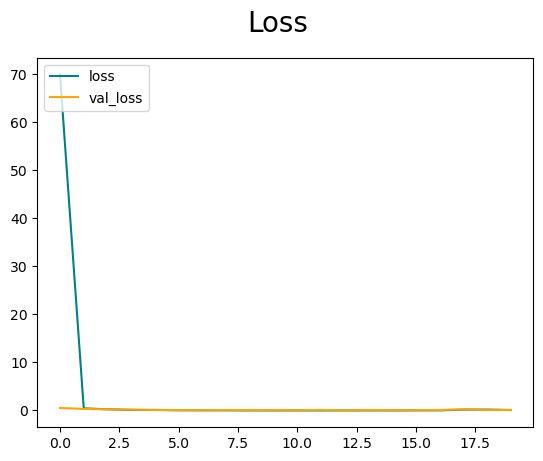

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

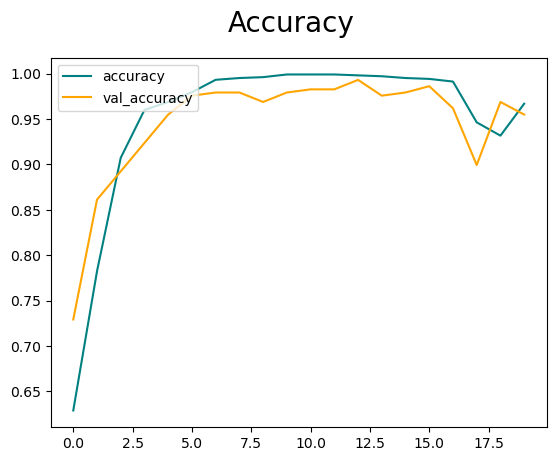

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 132ms/step


In [47]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9491525, shape=(), dtype=float32) tf.Tensor(0.9491525, shape=(), dtype=float32) tf.Tensor(0.953125, shape=(), dtype=float32)


In [48]:
import cv2


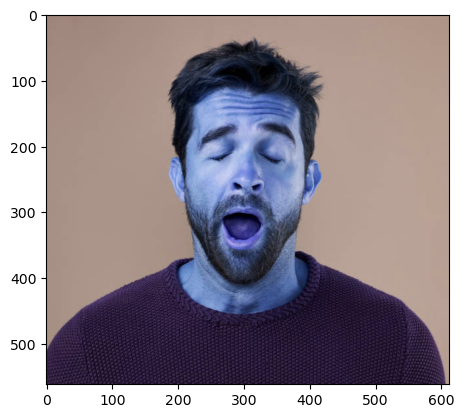

In [49]:
img = cv2.imread('ins.jpg')
plt.imshow(img)
plt.show()

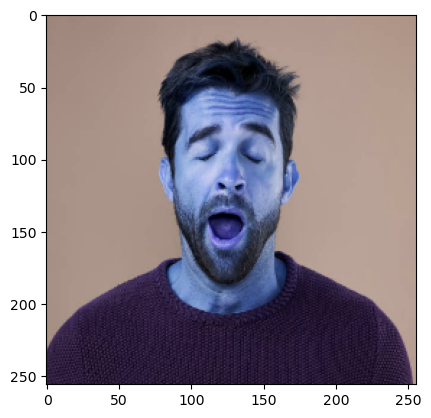

In [51]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 157ms/step


In [53]:
yhat

array([[0.51061606]], dtype=float32)

In [55]:
if yhat > 0.5: 
    print(f'Predicted class is yawning')
else:
    print(f'Predicted class is not yawning')

Predicted class is yawning


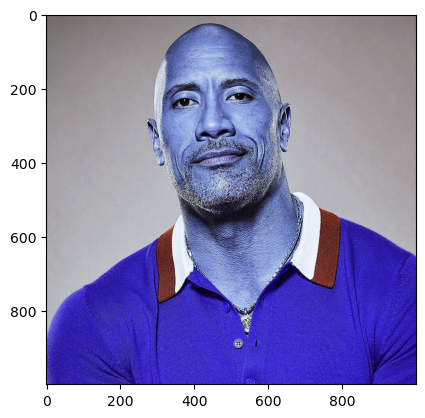

In [56]:
img = cv2.imread('test.jpg')
plt.imshow(img)
plt.show()

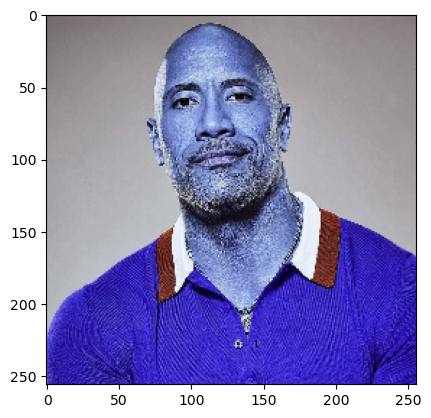

In [57]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [58]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 44ms/step


In [59]:
yhat

array([[0.499705]], dtype=float32)

In [60]:
if yhat > 0.5: 
    print(f'Predicted class is yawning')
else:
    print(f'Predicted class is not yawning')

Predicted class is not yawning
